## Exercício 1:
## Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.


In [ ]:
import pandas as pd
import matplotlib as plt
import plotly.express as px

caminho_csv = "../dados/M07_P03_BASE_SUPERMERCADO.csv"

df = pd.read_csv(caminho_csv, encoding="latin1")

pd.set_option("display.width", None)

df.rename(columns={"title":"Titulo"}, inplace=True)

print(df.head())

media_por_categoria = df.groupby("Categoria")["Preco_Normal"].mean().rename("Media", inplace=True)
mediana_por_categoria = df.groupby("Categoria")["Preco_Normal"].median().rename("Mediana", inplace=True)

media_por_categoria = media_por_categoria.sort_values(ascending=False)
mediana_por_categoria = media_por_categoria.sort_values(ascending=False)

print("\n", media_por_categoria.apply(lambda x: f"{x:.0f}"))
print("\n", mediana_por_categoria.apply(lambda x: f"{x:.0f}"))

## Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [ ]:
import pandas as pd
import matplotlib as plt
import plotly.express as px

caminho_csv = "../dados/M07_P03_BASE_SUPERMERCADO.csv"

df = pd.read_csv(caminho_csv, encoding="utf-8")

pd.set_option("display.width", None)

categorias_traducao = {
    "belleza-y-cuidado-personal": "Beleza e Cuidado Pessoal",
    "congelados": "Congelados",
    "comidas-preparadas":"Comidas Prontas",
    "lacteos": "Lacteos",
    "instantaneos-y-sopas":"Instantaneos e Sopas",
    "frutas": "Frutas",
    "verduras": "Verduras"
}

df["Categoria"] = df["Categoria"].map(categorias_traducao)

media_categoria = df.groupby("Categoria")["Preco_Normal"].mean().rename("Media")
mediana_categoria = df.groupby("Categoria")["Preco_Normal"].median().rename("Mediana")
df_resultado = pd.concat([media_categoria, mediana_categoria], axis=1)

media_maior_mediana = df_resultado[df_resultado["Media"] > df_resultado["Mediana"]]
media_menor_mediana = df_resultado[df_resultado["Mediana"] > df_resultado["Media"]]

print("\n", "Media > Mediana")
print(media_maior_mediana.map(lambda x: f"{x:.0f}"))

print("\n", "Media < Mediana")
print(media_menor_mediana.map(lambda x: f"{x:.0f}"))

In [ ]:
"""
Entre as 7 categorias, apenas a categoria "Comidas Prontas" tem a Média < Mediana.
As outras categorias restantes possuem a Média > Mediana.
"""

## Exercício 02:
## A) Traga o desvio padrão por categoria de produto.

In [ ]:
import pandas as pd
import matplotlib as plt
import plotly.express as px

df = pd.read_csv("M07_P03_BASE_SUPERMERCADO.csv", encoding="latin1")

pd.set_option("display.width", None)

df.rename(columns={"title":"Titulo"}, inplace=True)

print(df.head())

desvio_padrao = df.groupby("Categoria")["Preco_Normal"].std().round(2).rename("Desvio_Padrao", inplace=True)

print("\n", desvio_padrao)


## B) Qual o comportamento da média e mediana nas categorias com maior desvio?

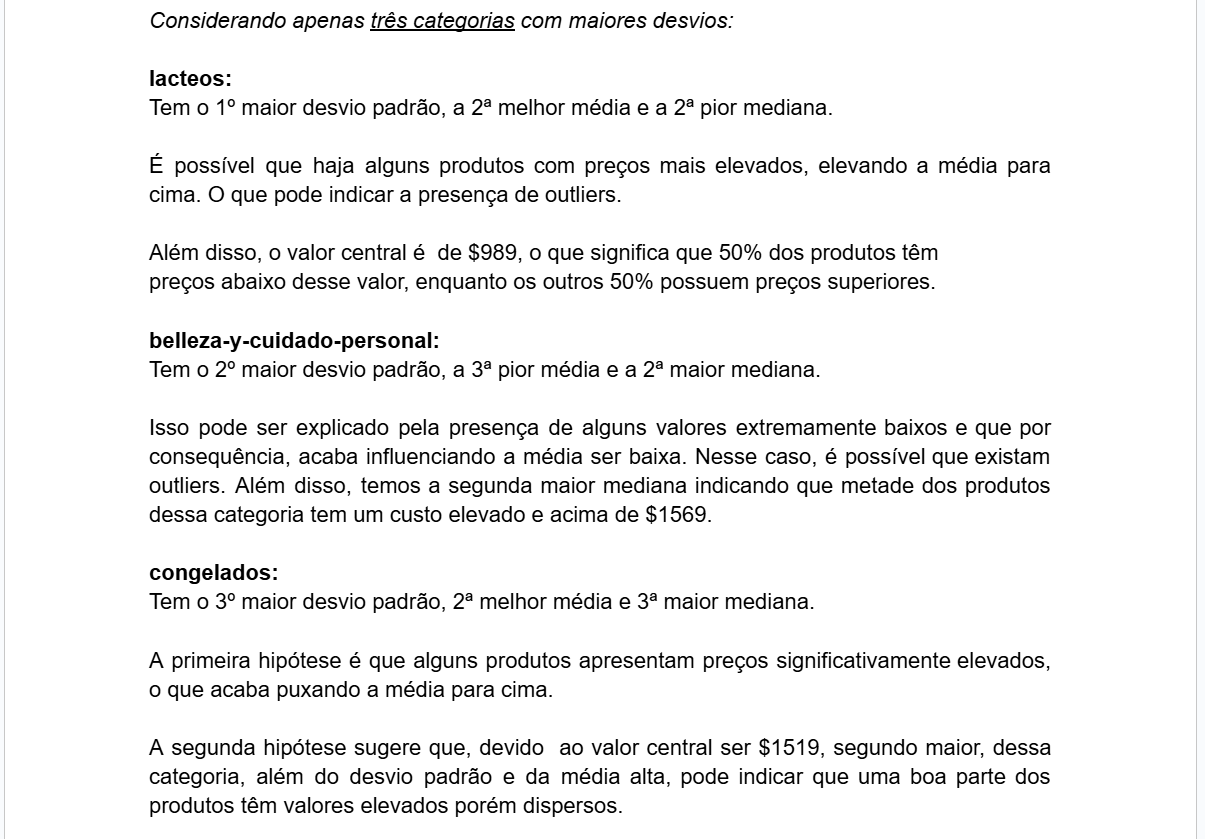

## Exercício 03  
## Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão.

In [ ]:
import pandas as pd
import matplotlib as plt
import plotly.express as px

caminho_csv = "../dados/M07_P03_BASE_SUPERMERCADO.csv"

df = pd.read_csv(caminho_csv, encoding="utf-8")

df_lacteos = df.loc[df["Categoria"] == 'lacteos',["Preco_Normal"]]

# Organização e Limpeza
df_lacteos = df_lacteos.dropna()
df_lacteos = df_lacteos.drop_duplicates()
valores_negativos = df_lacteos.loc[df_lacteos["Preco_Normal"] < 0]
print(" Valores Negativos: Inexistentes. " if valores_negativos.empty else valores_negativos, "\n")

# Gráfico
fig = px.box(
    df_lacteos,
    y="Preco_Normal",
    title="Boxplot Preco Normal da Categoria Lacteos",
    width=720,
    height=680,
    color_discrete_sequence=["purple"],
    labels={"Preco_Normal": "Preço Normal ($) "},
    points="all"
)

fig.show()


# BoxSplot
q1, mediana, q3 = df_lacteos["Preco_Normal"].quantile([0.25, 0.50, 0.75])
iqr = q3-q1
limite_superior = q3 + 1.5 * iqr
limite_inferior = q1 - 1.5 * iqr

outliers_unicos_cima = df_lacteos[df_lacteos["Preco_Normal"] > limite_superior].drop_duplicates().shape[0]
outliers_unicos_baixo = df_lacteos[df_lacteos["Preco_Normal"] < limite_inferior].drop_duplicates().shape[0]

print("Boxplot Medidas Importantes: ", "\n")
print("Qtd de Outliers Unicos Acima do Limite Superior: ", outliers_unicos_cima)
print("Qtd de Outliers Unicos Abaixo do Limite Inferior: ", outliers_unicos_baixo)
print("\n")
print(f"Primeiro Quartil (Q1): {q1:.0f}")
print(f"Terceiro Quartil (Q3): {q3:.0f}")
print(f"Mediana: {mediana:.0f}")
print(f"IQR: {iqr:.0f}")
print("\n")
print(f"Limite Superior: {limite_superior:.0f}")
print("Limite Inferior: ", limite_inferior)


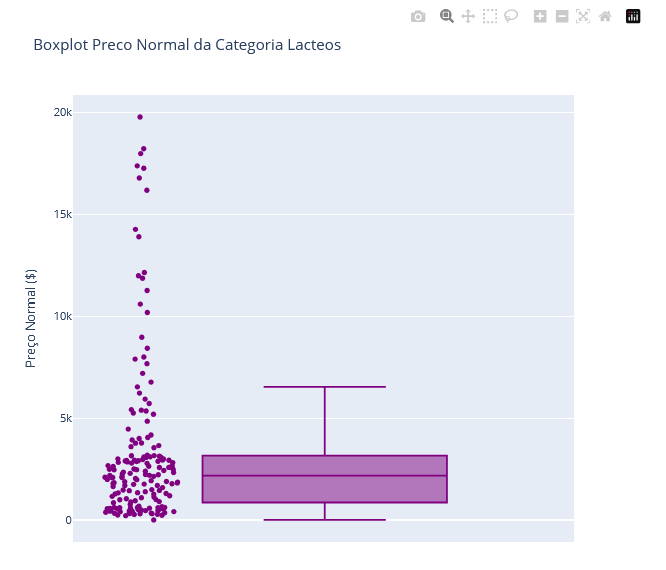


### 3) A) Como é a distribuição desses dados segundo o boxplot?  


In [ ]:
"""
Primeiro Quartil (Q1): 864
Terceiro Quartil (Q3): 3154
Mediana: 2179
IQR: 2290

Valores Negativos: Inexistentes.
Limite Superior: 6590
Limite Inferior: -2571.75
"""

### 3) B) Você identifica muitos outliers?



In [3]:
"""
Os outliers estão concentrados acima do limite superior.

Qtd de Outliers Únicos Acima do Limite Superior:  22
Qtd de Outliers Únicos Abaixo do Limite Inferior:  0
"""

'\nOs outliers estão concentrados acima do limite superior. Por exemplo:\n\nQtd de Outliers Únicos Acima do Limite Superior:  22\nQtd de Outliers Únicos Abaixo do Limite Inferior:  0\n'

## Exercício 04
## Plote um gráfico de barras onde temos a média de descontos por categoria.

In [ ]:
import pandas as pd
import plotly.express as px

caminho_csv = "../dados/M07_P03_BASE_SUPERMERCADO.csv"

df = pd.read_csv(caminho_csv, encoding="utf-8")

pd.set_option("display.width", None)

media_por_categoria = df.groupby("Categoria")["Desconto"].mean().reset_index()

categorias_traducao = {
    "belleza-y-cuidado-personal": "Beleza e Cuidado Pessoal",
    "congelados": "Congelados",
    "comidas-preparadas":"Comidas Prontas",
    "lacteos": "Lacteos",
    "instantaneos-y-sopas":"Instataneos e Sopas",
    "frutas": "Frutas",
    "verduras": "Verduras"
}

# Limpeza e Organização
media_por_categoria = (
    media_por_categoria
    .drop_duplicates()
    .sort_values(by="Desconto", ascending=False)
    .round(0)
)

media_por_categoria["Categoria"] = media_por_categoria["Categoria"].map(categorias_traducao)
print(media_por_categoria)

fig = px.bar (
        media_por_categoria,
        y = "Desconto",
        x = "Categoria",
        title = "Desconto Médio por Categoria",
        labels={"Desconto": "Desconto ($)"},
        text_auto=True,
    )

fig.update_traces(
        marker_color="#554c66",         # Lílas Escuro
        marker_line_width=1.5,
        marker_line_color='#cbbce6',    # Lílas Claro
        opacity=0.8,
        textfont=dict(color="black", size=14),
        textposition="outside"
)

fig.update_layout(
        title_font_size=18,
        title_font_color="black",
        height=700,
        width=1200,
        xaxis_title='',
        xaxis_tickfont=dict(size=14, color="black"),
        yaxis_title_font_size=16,
        yaxis_title_font_color="Black",
        yaxis=dict(
            showticklabels=False,
            tickfont=dict(size=14)
        ),
    )

fig.show()

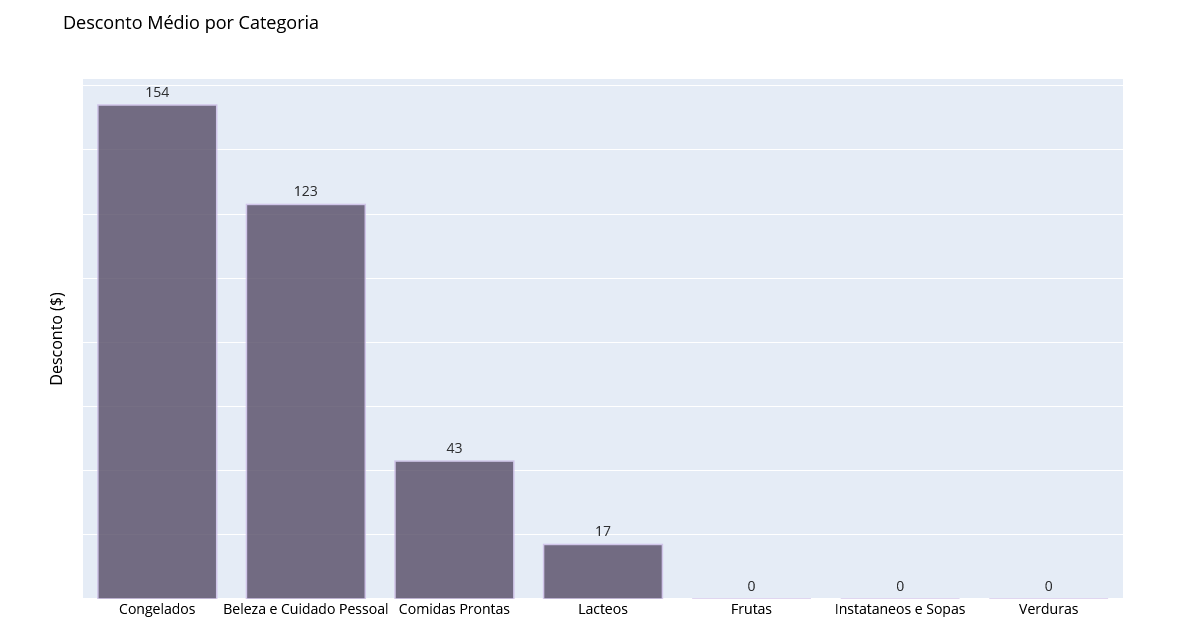

## Exercício 05
## Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [ ]:
import pandas as pd
import plotly.express as px

caminho_csv = "../dados/M07_P03_BASE_SUPERMERCADO.csv"

df = pd.read_csv(caminho_csv, encoding="utf-8")

pd.set_option("display.width", None)

traducao_categorias = {
    "belleza-y-cuidado-personal": "Beleza e Cuidado Pessoal",
    "congelados": "Congelados",
    "comidas-preparadas":"Comidas Prontas",
    "lacteos": "Lacteos",
    "instantaneos-y-sopas":"Instantâneos e Sopas",
    "frutas": "Frutas",
    "verduras": "Verduras"
}

media_por_categoria_marca = df.groupby(["Categoria", "Marca"])["Desconto"].mean().reset_index()

media_por_categoria_marca["Categoria"] = media_por_categoria_marca["Categoria"].map(traducao_categorias)

fig = px.treemap(
        media_por_categoria_marca.round(0),
        path=["Categoria", "Marca"],
        values="Desconto",
        title="Desconto Médio Por Categoria e Marca: "
)

fig.update_layout(
        width=1280,
        margin=dict(l=50, r=50, b=50, t=50)
)

fig.show()


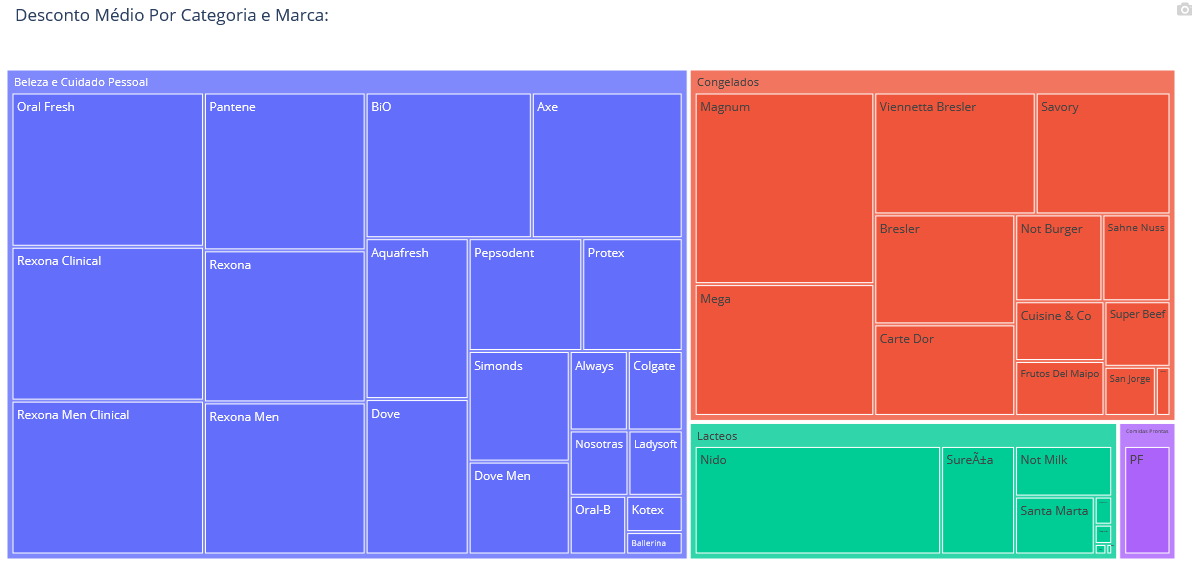